Submitted by :

Subhadutta Mahapatra (MDS201934)

Tanmey Rawal(MDS201938)


Install this library to see visualization,if you don't already have this in your system

In [1]:
#pip install pygame

importing libraries

In [2]:
import numpy as np
import pygame
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


Uploading the dataset and converting it to numpy array


In [3]:
def get_track(file_name):
    track=open(file_name,'r')
    temp = track.read() 
    temp_list = temp.split("\n") 
    string_track=[t.replace('F', '5').replace('S', '0').replace('O', '2').replace('X','1') for t in temp_list]
    final_track=[]
    for each in string_track:
        temporary=[]
        if len(each)!=0:
            for i in each:
                temporary.append(int(i))
            final_track.append(temporary)
    return np.array(final_track)

I have replaced:

F by 5

S by 0

O by 2

X by 1

In [4]:
track=get_track('track-1.txt')
track=np.flip(track) 

In [5]:
track

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

In [6]:
nrow,ncol=track.shape # saving the number of rows and columns

In [7]:
nrow

17

In [8]:
class Data:
    
    def get_start_line(self): # used for getting start line
        self.start_line = np.array([np.array([nrow-1,j]) for j in range(ncol) if self.track[nrow-1,j] == 5])
        
    def get_finish_line(self): # used for getting end line
        
        self.finish_line = np.array([np.array([0,i]) for i in range(ncol) if self.track[0,i] == 0])
        
    def __init__(self): # Constructor
        self.track=track
        self.get_start_line()
        self.get_finish_line()
        self.load_Q_vals()
        self.load_C_vals()
        self.load_pi()
        self.load_rewards()
        self.eps = 0.2 #Epislon hyperparmeter used for epislon greedy strategy
        self.df = 0.95 # discounting parameter for future parameters
        self.episode = dict({'S':[],'A':[],'probs':[],'R':[None]})
        
    #The following functions loads file and update files.
    
        
    def save_rewards(self,filename = 'rewards'):
        self.rewards = np.array(self.rewards)
        np.save(filename,self.rewards)
        self.rewards = list(self.rewards)
        
    def load_rewards(self):
        self.rewards = list(np.load('rewards.npy'))
        
    def save_pi(self,filename = 'pi.npy'):
        np.save(filename,self.pi)
        
    def load_pi(self):
        self.pi = np.load('pi.npy')
        
    def save_C_vals(self,filename = 'C_vals.npy'):
        np.save(filename,self.C_vals)
        
    def load_C_vals(self):
        self.C_vals = np.load('C_vals.npy')
        
    def save_Q_vals(self,filename = 'Q_vals.npy'):
        np.save(filename,self.Q_vals)
        
    def load_Q_vals(self):
        self.Q_vals = np.load('Q_vals.npy')

Creating Environment which would give out rewards and new state as per previous state and acction

In [9]:
class Environment:
    
    def get_new_state(self, state, action): # gives new state according to action
        new_state = state.copy()
        #State is an array having four elements (position_x,position_y,speed_x,speed_y)
        #action is an array having two elements (change in speed in x and y direction respectively) 
        new_state[0] = state[0] - state[2]
        new_state[1] = state[1] + state[3]
        new_state[2] = state[2] + action[0]
        new_state[3] = state[3] + action[1]
        return new_state
    
    def select_randomly(self,arr): # used while deciding starting position
        return np.random.choice(arr)
    
    def set_zero(arr):
        arr[:] = 0
        return arr
    
    def is_finish_line_crossed(self, state, action): # Checks whether it has crossed final line or not
        new_state = self.get_new_state(state, action)
        old_cell, new_cell = state[0:2], new_state[0:2]
        
        rows = np.array(range(new_cell[0],old_cell[0]+1))
        cols = np.array(range(old_cell[1],new_cell[1]+1))
        fin = set([tuple(x) for x in self.data.finish_line])
        row_col_matrix = [(x,y) for x in rows for y in cols]
        intersect = [x for x in row_col_matrix if x in fin]
        
        return len(intersect) > 0
    
    def has_collided(self, new_state,old_state):  # Checks whether it has collided with obstacle or not.
        sub_track=self.data.track[min(old_state[0],new_state[0]):max(old_state[0],new_state[0])+1,min(old_state[1],new_state[1]):max(old_state[1],new_state[1])+1]
        if 1 in sub_track:
            return True
        else:
            return False
    
    def is_out_of_track(self, state, action): # Checks whether it has shoot out of bounds or not
        new_state = self.get_new_state(state, action)
        old_cell, new_cell = state[0:2], new_state[0:2]
        
        if new_cell[0] < 0 or new_cell[0] >= nrow or new_cell[1] < 0 or new_cell[1] >= ncol:
            return True
        elif self.has_collided(new_cell,old_cell):
            return True
        else:
            return self.data.track[tuple(new_cell)] == 1
    
    def __init__(self, data): # Constructor
        self.data = data
        self.step_count = 0
    
    def reset(self): # Reset fuction
        self.data.episode = dict({'S':[],'A':[],'probs':[],'R':[None]})
        self.step_count = 0
    
    def start(self): # Function called at starting
        state = np.zeros(4,dtype='int')
        state[0] = nrow-1
        state[1] = self.select_randomly(self.data.start_line[:,1])
        
        return state
    
    def step(self, state, action): # Step function
        self.data.episode['A'].append(action)
        reward = -1
        reward_obs = -10
        reward_finish = 10
        
        if (self.is_finish_line_crossed(state, action)):
            new_state = self.get_new_state(state, action)
            
            self.data.episode['R'].append(reward_finish)
            self.data.episode['S'].append(new_state)
            self.step_count += 1
            
            return None, new_state
            
        elif (self.is_out_of_track(state, action)):
            self.data.episode['R'].append(reward_obs)
            new_state = self.start()
        else:
            new_state = self.get_new_state(state, action)
        
        self.data.episode['R'].append(reward)
        self.data.episode['S'].append(new_state)
        self.step_count += 1
        
        return reward, new_state
    


In [10]:
class Agent:
    
    def possible_actions(self, velocity):
        action_space = [np.array(x) for x in self.action_space]

        pa = []
        for i,x in zip(range(9),action_space):
            new_vel = np.add(velocity,x)
            if (new_vel[0] < 5) and (new_vel[1] < 5) and ~(new_vel[0] == 0 and new_vel[1] == 0):
                pa.append(i)
        pa = np.array(pa)
        
        return pa
    
    def map_to_1D(self,action):
        for i,x in zip(range(9),self.action_space):
            if action[0]==x[0] and action[1]==x[1]:
                return i
    
    def map_to_2D(self,action):
        return self.action_space[action]
    
    def __init__(self):
        self.action_space = [(-1,-1),(-1,0),(0,-1),(-1,1),(0,0),(1,-1),(0,1),(1,0),(1,1)]
    
    def get_action(self, state, policy):
        return self.map_to_2D(policy(state, self.possible_actions(state[2:4])))

Monte Carlo 

In [11]:
class Monte_Carlo:
    
    def evaluate_target_policy(self):
        env.reset()
        state = env.start()
        self.data.episode['S'].append(state)
        reward = -1
        while reward!=None:
            action = agent.get_action(state,self.generate_target_policy_action)
            reward, state = env.step(state,action)
            
        self.data.rewards.append(sum(self.data.episode['R'][1:]))
    
    def save_your_work(self):
        self.data.save_Q_vals()
        self.data.save_C_vals()
        self.data.save_pi()
        self.data.save_rewards()
    
    def determine_probability_behaviour(self, state, action, possible_actions):
        best_action = self.data.pi[tuple(state)]
        num_actions = len(possible_actions)
        
        if best_action in possible_actions:
            if action == best_action:
                prob = 1 - self.data.eps + self.data.eps/num_actions
            else:
                prob = self.data.eps/num_actions
        else:
            prob = 1/num_actions
        
        self.data.episode['probs'].append(prob)
    
    def generate_target_policy_action(self, state, possible_actions):
        
        if self.data.pi[tuple(state)] in possible_actions:
            action = self.data.pi[tuple(state)]
        else:
            action = np.random.choice(possible_actions)
            
        return action
    
    def generate_behavioural_policy_action(self, state, possible_actions):
        if np.random.rand() > self.data.eps and self.data.pi[tuple(state)] in possible_actions:
            action = self.data.pi[tuple(state)]
        else:
            action = np.random.choice(possible_actions)
        
        self.determine_probability_behaviour(state, action, possible_actions)
    
        return action
    
    def __init__(self, data):
        self.data = data
        for i in range(nrow):
            for j in range(ncol):
                if self.data.track[i,j]!=1:
                    for k in range(5):
                        for l in range(5):
                            self.data.pi[i,j,k,l] = np.argmax(self.data.Q_vals[i,j,k,l])
    
    def control(self,env,agent):
        env.reset()
        state = env.start()
        self.data.episode['S'].append(state)
        reward = -1
        while reward!=None:
            action = agent.get_action(state,self.generate_behavioural_policy_action)
            reward, state = env.step(state,action)
        
        G = 0
        V = 1
        T = env.step_count
        for t in range(T-1,-1,-1):
            G = data.df * G + self.data.episode['R'][t+1]
            S_t = tuple(self.data.episode['S'][t])
            A_t = agent.map_to_1D(self.data.episode['A'][t])
            
            S_list = list(S_t)
            S_list.append(A_t)
            SA = tuple(S_list)
            
            self.data.C_vals[SA] += V
            self.data.Q_vals[SA] += (V*(G-self.data.Q_vals[SA]))/(self.data.C_vals[SA])           
            self.data.pi[S_t] = np.argmax(self.data.Q_vals[S_t])
            if A_t!=self.data.pi[S_t]:
                break
            V /= self.data.episode['probs'][t]

Creating class which helps to visualize the movement

In [12]:
class Visualizer:
    
    
    def visualize_episode():
        for i in range(self.data.episode['S']):
            vis.visualize_racetrack(i)
    
    def create_window(self):
        self.display = pygame.display.set_mode((self.width, self.height))
        pygame.display.set_caption("Racetrack")
    
    def setup(self):
        self.cell_edge = 25
        self.width = ncol*self.cell_edge
        self.height = nrow*self.cell_edge
        self.create_window()
        self.window = True

    def close_window(self):
        self.window = False
        pygame.quit()

    def draw(self, state = np.array([])):
        self.display.fill(0)
        for i in range(nrow):
            for j in range(ncol):
                if self.data.track[i,j]!= 1:
                    if self.data.track[i,j] == 2:
                        color = (255,0,0)
                    elif self.data.track[i,j] == 5:
                        color = (255,255,0)
                    elif self.data.track[i,j] == 0:
                        color = (0,255,0)
                    pygame.draw.rect(self.display,color,((j*self.cell_edge,i*self.cell_edge),(self.cell_edge,self.cell_edge)),1)
        
        if len(state)>0:
            pygame.draw.rect(self.display,(255,255,255),((state[1]*self.cell_edge,state[0]*self.cell_edge),(self.cell_edge,self.cell_edge)),0)
        
        pygame.display.update()
        
        global count
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                self.loop = False
                self.close_window()
                return 'stop'
            elif event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
                count += 1
                self.loop = False
                
        return None
        
    def visualize_racetrack(self, state = np.array([])):
        if self.window == False:
            self.setup()
        self.loop = True
        while(self.loop):
            ret = self.draw(state)
            if ret!=None:
                return ret
    
    def __init__(self,data):
        self.data = data
        self.window = False

Creating objects of all above classes

In [13]:
data = Data()
env = Environment(data)
mc = Monte_Carlo(data)
vis = Visualizer(data)
agent = Agent()

In [14]:
for i in range(10000):
    mc.control(env,agent)
    if i%10 == 7:
        mc.evaluate_target_policy()
    
    if i%100 == 77:
        mc.save_your_work()

In [15]:
ch = 50
S = sum(data.rewards[:ch])/ch

R = []

for i in range(ch,len(data.rewards)):
    R.append(S)
    S *= ch
    S += data.rewards[i]
    S -= data.rewards[i-ch]
    S /= ch

Plotting rewards vs episode graph

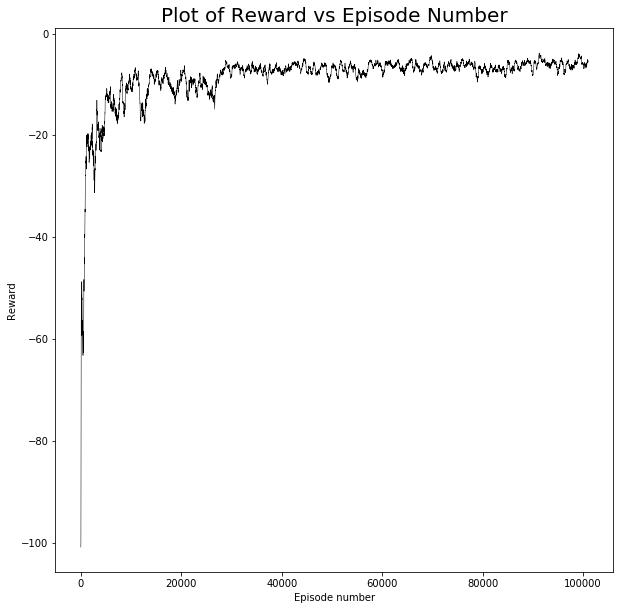

In [16]:
ax, fig = plt.subplots(figsize=(10,10))
x = np.arange(1,len(R)+1)
plt.plot(x*10, R, linewidth=0.5, color = '#000000')
plt.xlabel('Episode number', size = 10)
plt.ylabel('Reward',size = 10)
plt.title('Plot of Reward vs Episode Number',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [17]:
count = 0
env.reset()
state = env.start()
mc.data.episode['S'].append(state)
reward = -1
while reward!=None:
    action = agent.get_action(state,mc.generate_target_policy_action)
    reward, state = env.step(state,action)

In the following block you would see a icon on your taskbar and keep on pressing spacebar if you want to see the movement. If the agent collides or goes out of bound then it starts from starting line.

If the agent crosses the final line then the file would close

In [18]:
for i in data.episode['S']:
    if vis.visualize_racetrack(i) == 'stop':
        break
vis.close_window()